In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Read the csv file into notebook and print the first five lines of the Dataframe to confirm successful import.
PATH = "../Data cleaning/new_insurance.csv"
df = pd.read_csv(PATH, index_col=0)
print(df.head())

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   smoker_classify  gender_classify  
0                1                0  
1                0                1  
2                0                1  
3                0                1  
4                0                1  


In [3]:
#Get some information of the columns and their data type. How many entries in the Dataframe?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   charges          1338 non-null   float64
 7   smoker_classify  1338 non-null   int64  
 8   gender_classify  1338 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 104.5+ KB


In [4]:
#change the name of charges column to insurance_cost
df.rename(columns = {'charges':'insurance_cost'}, inplace=True)

In [5]:
#Get some statistics using .describe(). 
df.describe()

,age,bmi,children,insurance_cost,smoker_classify,gender_classify
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


The mean and median values for each column are similar, apart from insurance cost. With a mean of 13270.42 dollars and a median of 9382.03 dollars, there could potentially be some outliers that is making the mean greater than the median. The minimum BMI of 15.96 is classed as underweight whereas the maximum BMI of 53.13 is morbidly obese so a wide range of BMIs that can cause different health problems and therefore affect the insurance. Both the median and mean BMI are classed as overweight

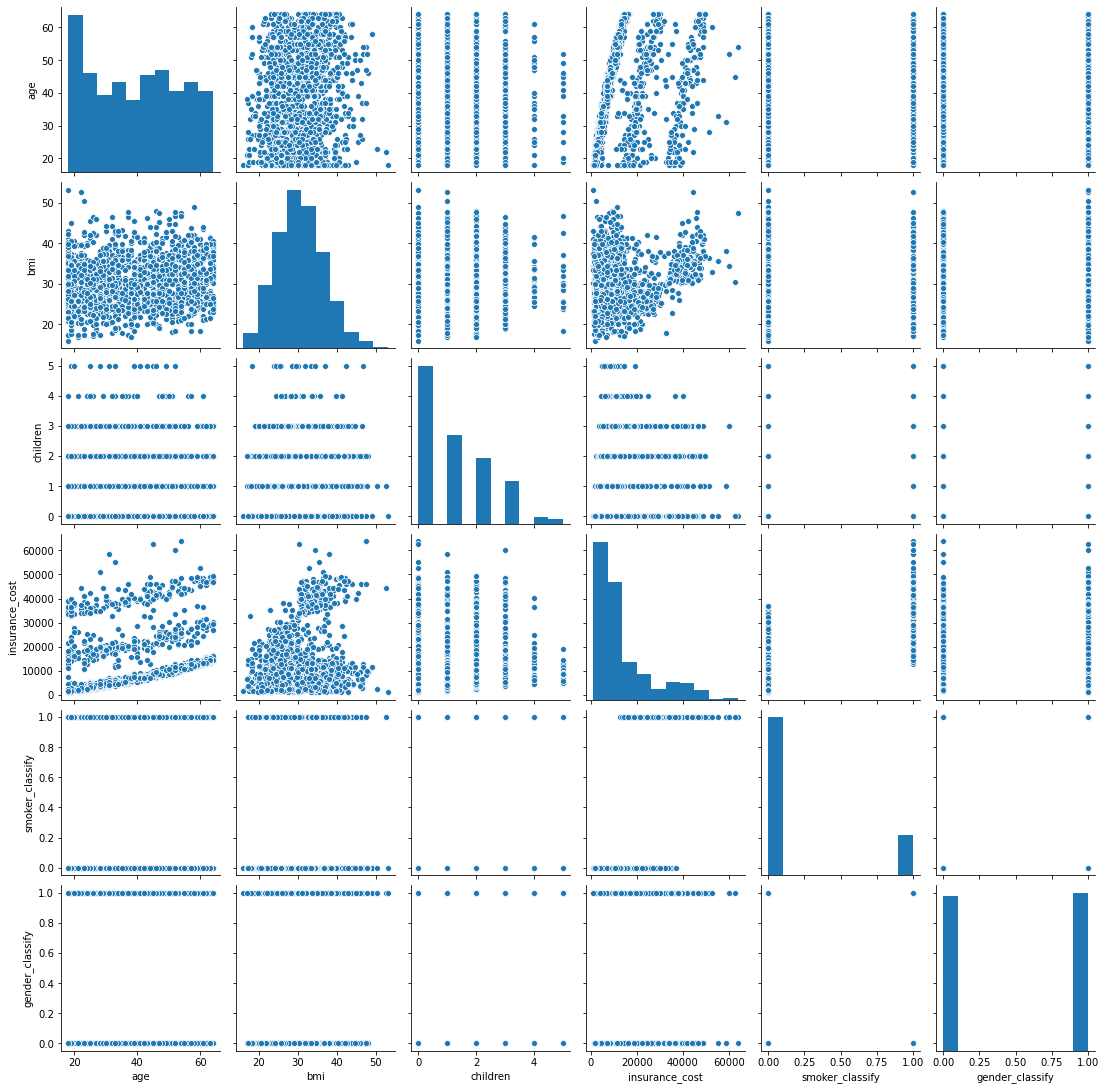

In [6]:
sns.pairplot(df)

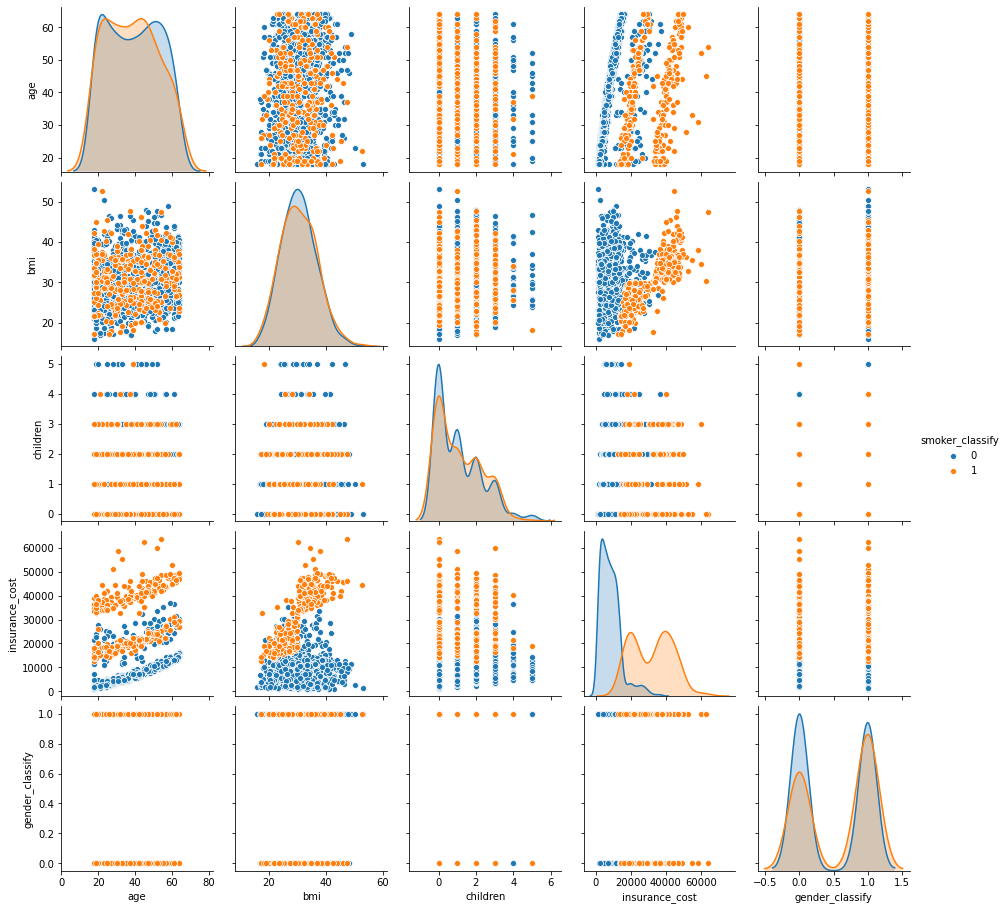

In [7]:
sns.pairplot(df, hue="smoker_classify")

It seems that the smokers are more likely to have a larger insurance cost- being a smoker must be considered as a large cost factor in the insurance calculations and probably a good predictive variable.

There seems to be a three distinct and slightly linear populations in the scatter plot for age and insurance cost. Again, the algorithm that is used to calculate the insurance cost must be influenced by age. Below are some of the questions that I shall try to answer... 

In [8]:
#Analyse histogram of BMI (male and female histograms) for any difference
#Analyse histogram of BMI
#Analyse histogram of charges
#Violinplot for each distribution
#predictive analysis of insurance cost based on other variables? Multiple regression? logistic regression? KNN?

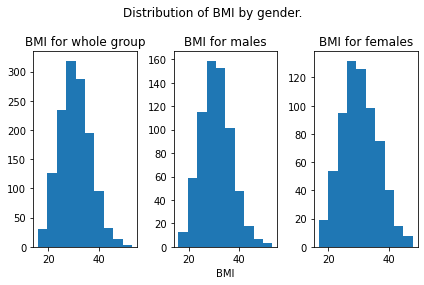

The average BMI for male and females in this insurance group are 30.94 and 30.38, respectively
The median BMI for male and females in this insurance group are 30.69 and 30.11, respectively
Overall, there isn't much variation in the means and medians, and they follow a fairly normal dictribution, similar to the whole group.


In [9]:
#Analyse histogram of BMI (male and female histograms)
bmi = df.bmi
male = df[df["sex"] == "male"]
female = df[df["sex"] == "female"]
male = male.bmi
female = female.bmi
male_mean_bmi = np.mean(male)
female_mean_bmi = np.mean(female)
male_median_bmi = np.median(male)
female_median_bmi = np.median(female)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.suptitle("Distribution of BMI by gender.")
ax1.hist(bmi)
ax1.set_title("BMI for whole group")
ax2.hist(male)
ax2.set_title("BMI for males")
ax2.set_xlabel("BMI")
ax3.hist(female)
ax3.set_title("BMI for females")

plt.tight_layout()
plt.show()

print("The average BMI for male and females in this insurance group are {} and {}, respectively"\
      .format(round(male_mean_bmi, 2), round(female_mean_bmi, 2)))
print("The median BMI for male and females in this insurance group are {} and {}, respectively"\
      .format(round(male_median_bmi, 2), round(female_median_bmi, 2)))
print("Overall, there isn't much variation in the means and medians, and they follow a fairly normal dictribution, similar to \
the whole group.")
#not much difference in BMIs

In [10]:
#Analyse histogram of insurance costs
#Analyse based on ages
#split into ages groups

age18_29 = df[(df["age"] >= 18) & (df["age"] < 30)]
age30_39 = df[(df["age"] >= 30) & (df["age"] < 40)]
age40_49 = df[(df["age"] >= 40) & (df["age"] < 50)]
age50_59 = df[(df["age"] >= 50) & (df["age"] < 60)]
age60_65 = df[(df["age"] >= 60) & (df["age"] < 65)]


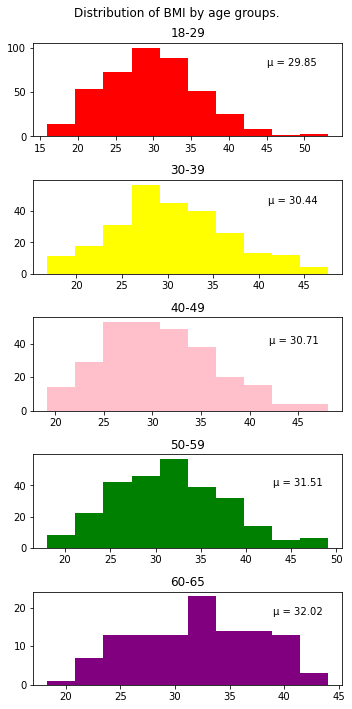

The distribution of BMI for each age group is normal to right skewed, with fairly similar ranges. However, it seems like       the mean BMI increases as the age group increases. This could be for multiple reasons but is likely one of the reasons why       the insurance charge increases with age.


In [11]:
fig = plt.figure(figsize=(5,10))
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig)

fig.suptitle("Distribution of BMI by age groups.")

ax1 = fig.add_subplot(spec2[0, 0])
ax1.set_title("18-29")
ax1.hist(age18_29.bmi, color="red")
ax1.text(45, 80, u'\u03bc = {}'.format(round(np.mean(age18_29.bmi), 2)))

ax2 = fig.add_subplot(spec2[1, 0])
ax2.set_title("30-39")
ax2.hist(age30_39.bmi, color="yellow")
ax2.text(41, 45, u'\u03bc = {}'.format(round(np.mean(age30_39.bmi), 2)))

ax3 = fig.add_subplot(spec2[2, 0])
ax3.set_title("40-49")
ax3.hist(age40_49.bmi, color="pink")
ax3.text(42, 40, u'\u03bc = {}'.format(round(np.mean(age40_49.bmi), 2)))

ax4 = fig.add_subplot(spec2[3, 0])
ax4.set_title("50-59")
ax4.hist(age50_59.bmi, color="green")
ax4.text(43, 40, u'\u03bc = {}'.format(round(np.mean(age50_59.bmi), 2)))

ax5 = fig.add_subplot(spec2[4, 0])
ax5.set_title("60-65")
ax5.hist(age60_65.bmi, color="purple")
ax5.text(39, 18, u'\u03bc = {}'.format(round(np.mean(age60_65.bmi), 2)))

plt.tight_layout()
plt.show()

print("The distribution of BMI for each age group is normal to right skewed, with fairly similar ranges. However, it seems like \
      the mean BMI increases as the age group increases. This could be for multiple reasons but is likely one of the reasons why \
      the insurance charge increases with age.")

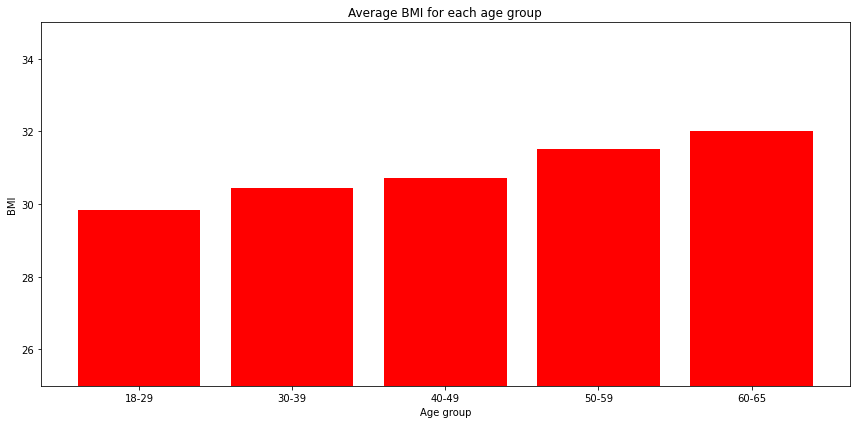

This is a better graphical representation of the average BMI for each age group. A clear increase in the average BMI as the age group increases.


In [12]:
#Plot the average bmi of each age group
mean_bmi_age = {"18-29": np.mean(age18_29.bmi), "30-39": np.mean(age30_39.bmi), "40-49": np.mean(age40_49.bmi), \
            "50-59": np.mean(age50_59.bmi), "60-65": np.mean(age60_65.bmi)}
        
bmi_values = list(mean_bmi_age.values())
bmi_keys = list(mean_bmi_age.keys())

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
plt.bar(bmi_keys, bmi_values, color="r")
plt.title("Average BMI for each age group")
plt.xlabel("Age group")
plt.ylabel("BMI")
ax.set_ylim([25,35])

plt.tight_layout()
plt.show()

print("This is a better graphical representation of the average BMI for each age group. A clear increase in the average BMI as \
the age group increases.")

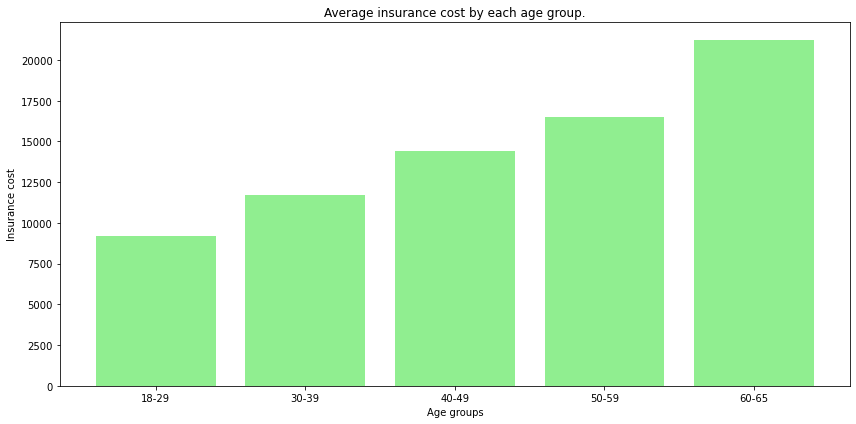

In [13]:
#Plot average insurance cost by age (should increase)
mean_cost_age = {"18-29": np.mean(age18_29.insurance_cost), "30-39": np.mean(age30_39.insurance_cost), "40-49":\
                    np.mean(age40_49.insurance_cost), "50-59": np.mean(age50_59.insurance_cost),\
                    "60-65": np.mean(age60_65.insurance_cost)}

cost_values = list(mean_cost_age.values()) 
cost_keys = list(mean_cost_age.keys())

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
plt.bar(cost_keys, cost_values, color="lightgreen")
plt.title("Average insurance cost by each age group.")
plt.xlabel("Age groups")
plt.ylabel("Insurance cost")

plt.tight_layout()
plt.show()

Averages provided above indicates that both BMI and insurance cost increase as age increases.

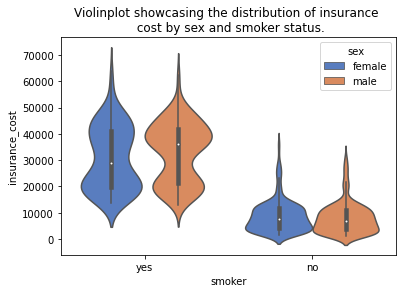

There is a clear impact of smoking on insurance cost. If you are a smoker, then your insurance cost will be greater.


In [14]:
#violinplot for each distribution

sns.violinplot(x="smoker", y="insurance_cost", hue="sex", data=df, palette="muted")
plt.title("Violinplot showcasing the distribution of insurance \n cost by sex and smoker status.")
plt.show()

print("There is a clear impact of smoking on insurance cost. If you are a smoker, then your insurance cost will be greater.")

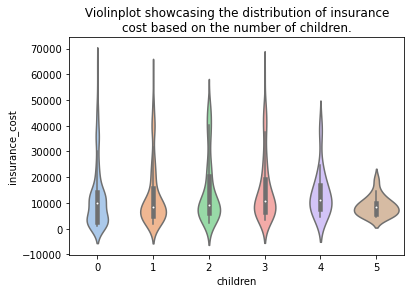

There doesn't seem to be much variation in the distribution of insurance cost for the number of children.
There seems to be a significantly smaller range for individuals with 5 children. What could be the reason for this?


In [15]:
sns.violinplot(x="children", y="insurance_cost", data=df, palette="pastel")
plt.title(" Violinplot showcasing the distribution of insurance \ncost based on the number of children.")
plt.show()

print("There doesn't seem to be much variation in the distribution of insurance cost for the number of children.")
print("There seems to be a significantly smaller range for individuals with 5 children. What could be the reason for this?")

In [16]:
#analyze average insurance cost based on number of children
no_children = df[df["children"] == 0]
no_children_cost = no_children.insurance_cost
one_child = df[df["children"] == 1]
one_child_cost = one_child.insurance_cost
two_children = df[df["children"] == 2]
two_children_cost = two_children.insurance_cost
three_children = df[df["children"] == 3]
three_children_cost = three_children.insurance_cost
four_children = df[df["children"] == 4]
four_children_cost = four_children.insurance_cost
five_children = df[df["children"] == 5]
five_children_cost = five_children.insurance_cost

#calculate the mean and median for each group
no_children_cost_mean = np.mean(no_children_cost)
no_children_cost_median = np.median(no_children_cost)
one_child_cost_mean = np.mean(one_child_cost)
one_child_cost_median = np.median(one_child_cost)
two_children_cost_mean = np.mean(two_children_cost)
two_children_cost_median = np.median(two_children_cost)
three_children_cost_mean = np.mean(three_children_cost)
three_children_cost_median = np.median(three_children_cost)
four_children_cost_mean = np.mean(four_children_cost)
four_children_cost_median = np.median(four_children_cost)
five_children_cost_mean = np.mean(five_children_cost)
five_children_cost_median = np.median(five_children_cost)

#create dictionary for means and medians
labels = ["one", "two", "three", "four", "five"]
means = [no_children_cost_mean, one_child_cost_mean, two_children_cost_mean, three_children_cost_mean, four_children_cost_mean,\
        five_children_cost_mean]
medians = [no_children_cost_median, one_child_cost_median, two_children_cost_median, three_children_cost_median,\
          four_children_cost_median, five_children_cost_median]
children_means = {k:v for k, v in zip(labels, means)}
children_medians = {k:v for k, v in zip(labels, medians)}

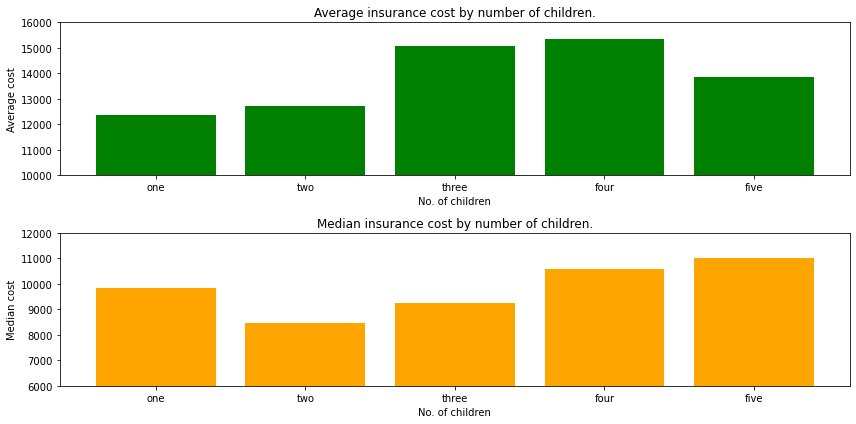

In [17]:
#plot means and medians
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))

ax1.bar(children_means.keys(), children_means.values(), color="g")
ax1.set_title("Average insurance cost by number of children.")
ax1.set_xlabel("No. of children")
ax1.set_ylabel("Average cost")
ax1.set_ylim([10000,16000])

ax2.bar(children_medians.keys(), children_medians.values(), color="orange")
ax2.set_title("Median insurance cost by number of children.")
ax2.set_xlabel("No. of children")
ax2.set_ylabel("Median cost")
ax2.set_ylim([6000,12000])

plt.tight_layout()
plt.show()

Individuals with three or four children have higher insurance costs, but these may be greatly influenced by outliers as the medians are similar. The outliers are on the following boxplots

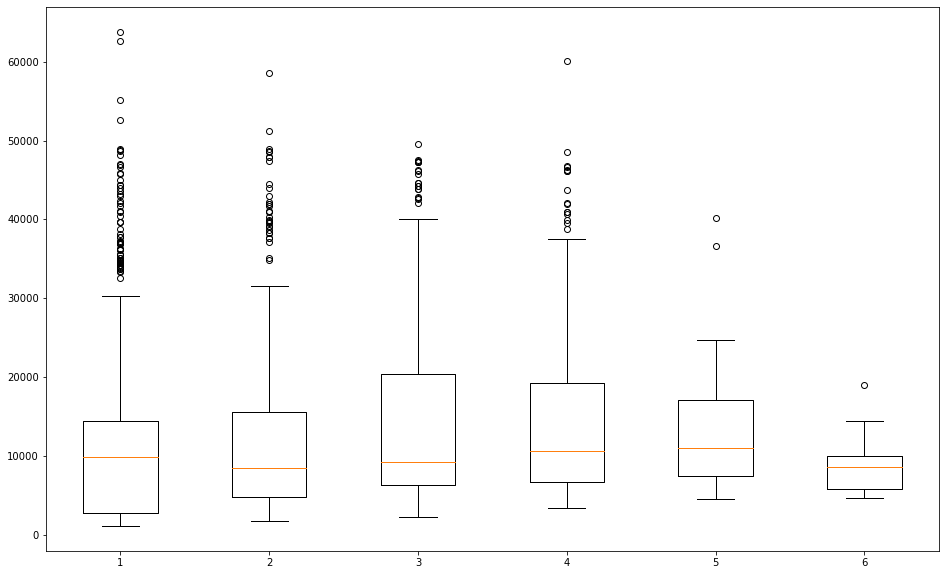

In [18]:
children_costs = [no_children.insurance_cost, one_child.insurance_cost, two_children.insurance_cost,\
                  three_children.insurance_cost, four_children.insurance_cost, five_children.insurance_cost]

plt.figure(figsize=(16, 10))
plt.boxplot(children_costs)

plt.show()

In [20]:
#Multiple linear regression using age and BMI
#Split data into training and test sets
x = df[["age","bmi"]]
y = df["insurance_cost"]
x = x.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
mlr = LinearRegression().fit(X_train,y_train)

print("Coefficients of multiple linear regression model: {},{}".format(round(mlr.coef_[0], 2), round(mlr.coef_[1], 2)))
print("Intercept of multiple linear regression model: {}".format(round(mlr.intercept_, 2)))
print("Equation of multiple linear regression model: y = {} + {}x_1 + {}x_2".format(round(mlr.intercept_, 2),\
                                                                            round(mlr.coef_[0], 2), round(mlr.coef_[1], 2)))


Coefficients of multiple linear regression model: 218.85,302.5
Intercept of multiple linear regression model: -4663.59
Equation of multiple linear regression model: y = -4663.59 + 218.85x_1 + 302.5x_2


In [21]:
mlr_score = mlr.score(X_train, y_train)
print("R^2 score for the regression model is {}".format(mlr_score))

R^2 score for the regression model is 0.1001470499245104


The R^2 score is low which is evidence that the model isn't very accurate when the relationship between the residual sum of squares (RSS) and the total sum of squares (TSS) are compared.

In [22]:
#make prediction on y_test
predictions = mlr.predict(X_test)
print(predictions[:10], y_test[:10])

[15852.1912445  14506.86338405 18112.22669946 20296.31169632
 11957.93824327  9243.30508706  7236.06331943 17504.31770866
 12791.31357732 11518.00168922] [ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525   4500.33925
  2198.18985 11436.73815  7537.1639   5425.02335]


I have printed the first ten values of the predictions made from the regression model using the test data and the first ten values of the dependent test values. A good model should produce similar results, but based on the R^2 score and the comparison of the first ten results, this is not a suitable model to use for making suitable predictions.

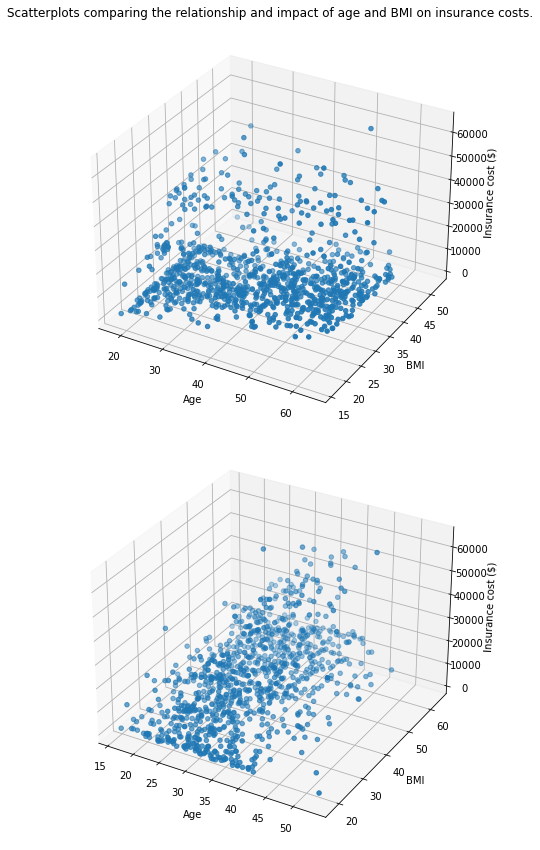

In [23]:
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

ax1.scatter(X_train[:, 0], X_train[:, 1], y_train)
ax1.set_xlabel('Age')
ax1.set_ylabel('BMI')
ax1.set_zlabel('Insurance cost ($)')

ax2.scatter(X_train[:, 1], X_train[:, 0], y_train)
ax2.set_xlabel('Age')
ax2.set_ylabel('BMI')
ax2.set_zlabel('Insurance cost ($)')

fig.suptitle("Scatterplots comparing the relationship and impact of age and BMI on insurance costs.")
plt.tight_layout()

plt.show()

It is difficult to see a strong relationship between any of the variables in the scattergraph above. There does seem to be an increase in insurance cost as the age of the individual increases but the BMI variable seems to be a bit more random, possibly due to a variation in lifestyles that people adopt. It is logical that age impacts the insurance cost when age-related diseases are considered (cardiovascular-related diseases, certain cancers, dementia, bone fractures such as hip).

In [25]:
#construct another mlr model but incorporate smoking status
x = df[["age","bmi","smoker_classify"]]
y = df["insurance_cost"]
x = x.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
mlr2 = LinearRegression().fit(X_train,y_train)

print("Coefficients of multiple linear regression model: {},{}".format(round(mlr2.coef_[0], 2), round(mlr2.coef_[1], 2),\
                                                                      round(mlr2.coef_[2], 2)))
print("Intercept of multiple linear regression model: {}".format(round(mlr2.intercept_, 2)))
print("Equation of multiple linear regression model: y = {} + {}x_1 + {}x_2 + {}x_3".format(round(mlr2.intercept_, 2),\
                                                                            round(mlr.coef_[0], 2), round(mlr.coef_[1], 2),\
                                                                            round(mlr2.coef_[2], 2)))

Coefficients of multiple linear regression model: 254.27,315.05
Intercept of multiple linear regression model: -11227.75
Equation of multiple linear regression model: y = -11227.75 + 218.85x_1 + 302.5x_2 + 23661.26x_3


In [26]:
mlr2_score = mlr2.score(X_train, y_train)
print("R^2 score for the regression model is {}".format(mlr2_score))

R^2 score for the regression model is 0.7307920456437863


Based in the R^2 score, this regression model is better than the previous model. I will make predictions using the test set and compare the first 10 values

In [27]:
#predictions using second regression model
predictions = mlr2.predict(X_test)

In [28]:
#compare predictions to actual data
print(predictions[:10], y_test[:10])

[11508.96093643  9976.10453072 37418.6258025  16374.52729505
  7426.82950831  4151.73056461  1639.71046655 13203.27270715
  7952.28988486  6441.74692623] [ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525   4500.33925
  2198.18985 11436.73815  7537.1639   5425.02335]


These predictions are much closer to the real value than the previous model. Although more improvements could probably be made, I would be more confident to us this model.